# 1. LIBRERÍAS

In [47]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
import pickle

# 2. LECTURA DE DATOS

In [2]:
#Lectura de los datos desde la fuente
ruta1="D:/Google Drive/EAFIT/base_nodos_servicio.xlsx"
ruta2="D:/Google Drive/EAFIT/full_data_nodos_EAFIT.csv"

df_bns=pd.read_excel(ruta1, sheet_name="Promedio")

df_dnE=pd.read_csv(ruta2,sep=";")

# 3. LIMPIEZA DE DATOS

In [3]:
#Datos que desde el entendimiento del negocio no tienen ninguna afectación en las ventas

#Base nodos servicio
df_bns.drop(['Orden', 'Infracciones_PORCENTAJE_FEC', 'Infracciones_PORC_UTIL_MINSLOTS',	'Infracciones_NPA',	'Infracciones_PORCENTAJE_SATURACION_DOWN',	'Infracciones_PORCENTAJE_SATURACION_UP',	'Infracciones_PORCENTAJE_16QAM',	'Infracciones_PORCENTAJE_QPSK',	'Infracciones_Power_UP',	'Infracciones_Power_DOWN',	'Infracciones_PORCENTAJE_SNR',	'Infracciones_SNR_UP',	'Infracciones_SNR_DOWN',	'Infracciones_INTERF_700',	'DAÑOS_OTROS',	'DAÑOS_PREMISAS',	'DAÑOS_TOTAL',	'Danos_TG2482',	'Danos_TC8305',	'Danos_TC7300',	'Danos_CGNV2',	'Danos_DPC3941T2',	'Danos_NULL',	'Danos_total',	'LLAMADAS',	'CMTS',	'REGIONAL',	'DISPERSION_NPA',	'DISPERSION_SATURACION_DOWN',	'DISPERSION_SATURACION_UP',	'DISPERSION_PORCENTAJE_FEC',	'DISPERSION_PORCENTAJE_NOFEC',	'DISPERSION_POWER_UP',	'DISPERSION_POWER_DOWN',	'DISPERSION_PORCENTAJE_SNR',	'DISPERSION_SNR_UP',	'DISPERSION_SNR_DOWN',	'DISPERSION_PORC_UTIL_MINSLOTS',	'HP EFEC',	'HP OCUP',	'total_cm_interes',	'Total_cm_Obsoletos',	'Core_Consistent_Quality',	'Excellent_Consistent_Quality',	'TTS_TOTAL_ENERGIA',	'TIEMPO_TTS_TOTAL_ENERGIA',	'TTS_PARCIAL_ENERGIA',	'TIEMPO_TTS_PARCIAL_ENERGIA',	'TTS_TOTAL_SINENERGIA',	'TIEMPO_TTS_TOTAL_SINENERGIA',	'TTS_PARCIAL_SINENERGIA',	'TIEMPO_TTS_PARCIAL_SINENERGIA',	'TTS_INDISP_TOTAL',	'TTS_INDP_PARCIAL',	'POSIBLES_FRAUDES'
], axis='columns', inplace=True)

#Data nodos EAFIT
df_dnE.drop(['FECHA_ACTUALIZACION', 'HH_ESPERADO', 'DEPARTAMENTO', 'MUNICIPIO',	'ANTIGUEDAD',	'REGION_2018',	'NOMBRE NODO',	'NODOS_BAJA_OCUPACION_OFERTA_PRODUCTO',	'DIRECCIONALIDAD_NODO',	'FUENTE',	'MARCA_DIGITAL',	'ORIGEN_NODO',	'TIPO_NODO',	'TECNOLOGIA',	'FECHA_INICIO_OPERACION_NODO',	'Q_NODO',	'HP EFEC',	'HP OCUP',	'%ESP_MILL_MES',	'%ESP_MILL_ANO',	'NETO RGU',	'CHURN RGU',	'NETO',	'ANOMES_PROCESO',	'MARCA_R',	'VENTAS_ANUALADAS',	'VENTAS_PENDIENTES',	'VENTAS_INSTALADAS',	'NODO_CRITICO',	'BARRIO_MODA',	'RANGO_ANTIGUEDAD2',	'RGU_B2B',	'EMPRESA',	'ARREGLO',	'REGIONAL_2020',	'CODIGO_NODO',	'INDISP_Q',	'PERFORMANCE',	'UTILIZATION',	'DANOS_Q',	'ACUM_CALIDAD',	'DANOS_CONSECUTIVOS',	'DANOS_Q_ACUM',	'EQUIPOS',	'INTRAESTRUCTURA',	'OTROS',	'PORC_DANOS_EQUIPOS',	'PORC_DANOS_INTRAESTRUCTURA',	'PORC_DANOS_OTROS',	'PORC_DANOS_PREMISAS',	'PORC_DANOS_TOTAL',	'PREMISAS'], axis='columns', inplace=True)

In [4]:
#Datos nulos
df_dnE=df_dnE.dropna()
df_bns=df_bns.dropna()

In [5]:
#Unión de los DF
df_dnE['NODO'] = pd.to_numeric(df_dnE['NODO'], errors='coerce')
df_bns['NODO'] = pd.to_numeric(df_bns['NODO'], errors='coerce')

df = pd.merge(df_dnE, df_bns, on='NODO', how='inner', suffixes=('_1', '_2'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8745 entries, 0 to 8744
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CUMPLE_META_HOME               8745 non-null   int64  
 1   ANTIGUEDAD_MES                 8745 non-null   int64  
 2   ESTRATO                        8745 non-null   int64  
 3   VP_SOLICITANTE                 8745 non-null   int64  
 4   INST RGU                       8745 non-null   int64  
 5   DX VOL RGU                     8745 non-null   int64  
 6   RX RGU                         8745 non-null   int64  
 7   NSS RGU                        8745 non-null   int64  
 8   HH HOME                        8745 non-null   int64  
 9   RGUS HOME                      8745 non-null   int64  
 10  RGUS_TO_HOME                   8745 non-null   int64  
 11  RGUS_BA_HOME                   8745 non-null   int64  
 12  RGUS_TV_HOME                   8745 non-null   i

# 4. ANÁLISIS DE DATOS

In [6]:
#Funciones
def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df.targetVar, ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df.targetVar, ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if tipo == 'c':
                sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
            if tipo == 'b':
                sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
            if tipo == 's':
                sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [7]:
#Definición de variables categóricas para graficar
catCols=df.select_dtypes(include = ["object"]).columns.tolist()

#Definición de variables numéricas para graficar
numCols=df.select_dtypes(include = ["float64", "int64"]).columns.tolist()

## 4.1. VARIABLES CATEGÓRICAS

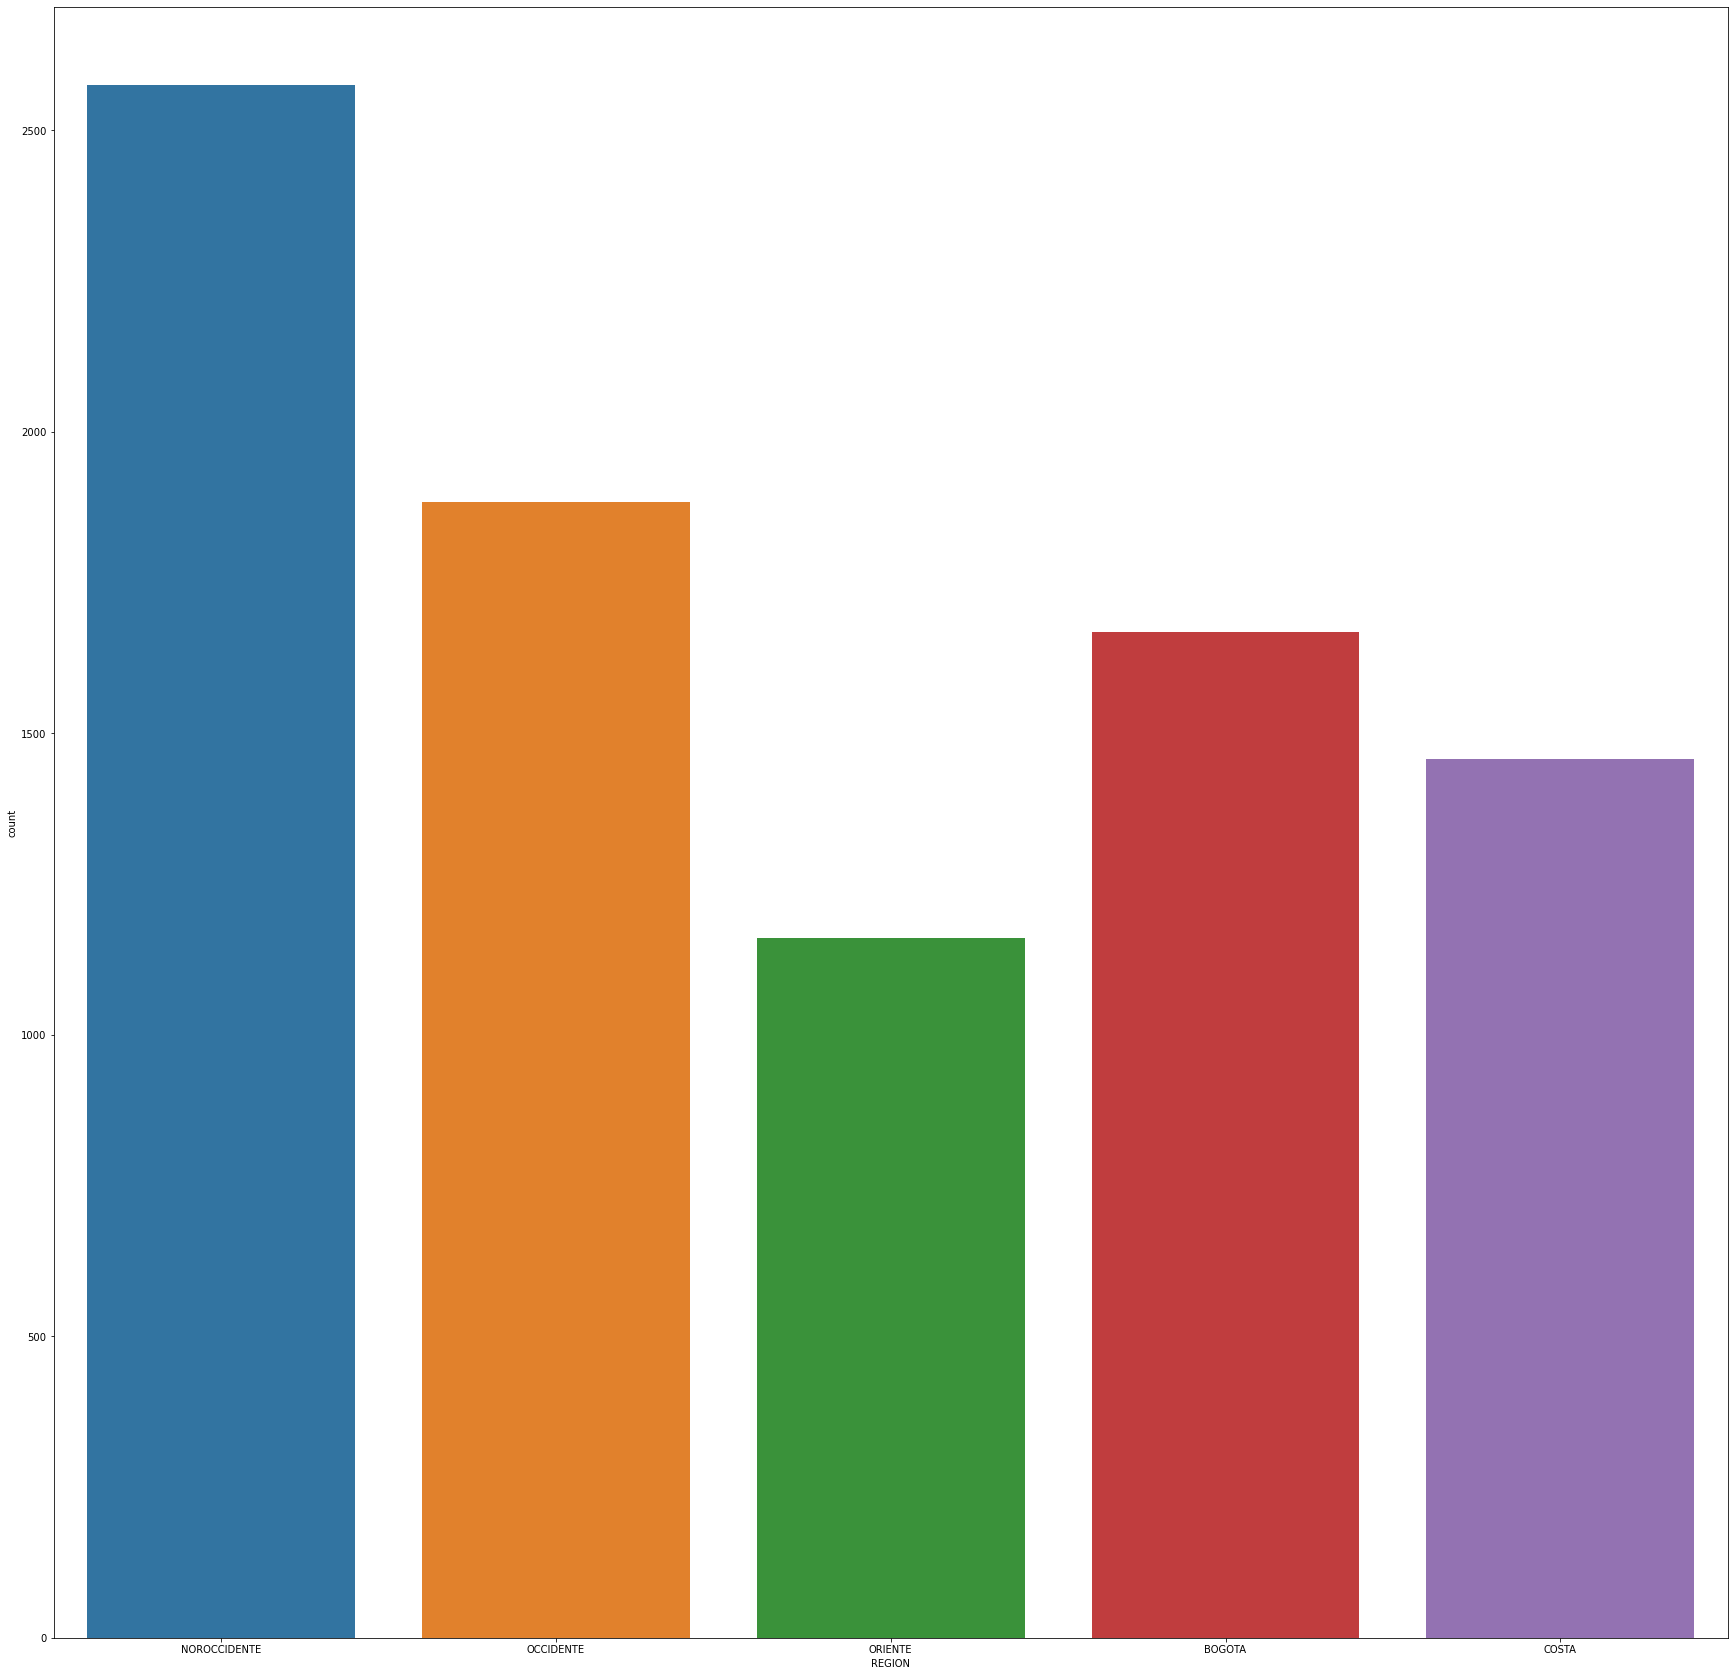

In [8]:
#PLOT de frecuencia región
plot_multiples_graficas(df,catCols, 1, 1, 'c', None, (30,30))

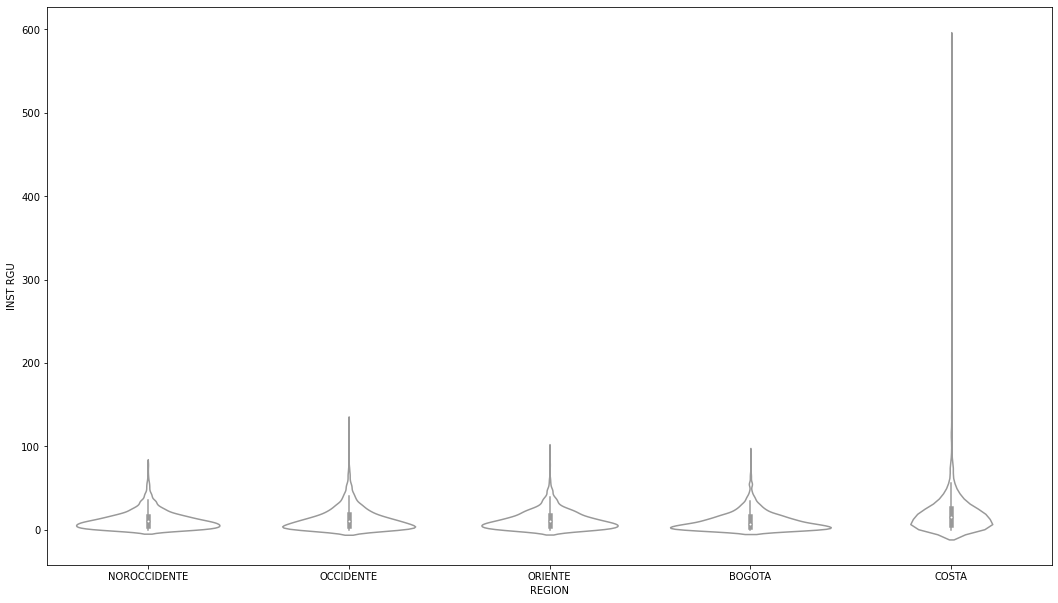

In [9]:
#Influencia de región en las instalaciones
fig = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
#axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'INST RGU',
        data  = df,
        color = "white",
        #ax    = axes[i]
    )

    
#fig.tight_layout()
plt.subplots_adjust(top=0.9)
#fig.suptitle('Distribución de instalaciones por región', fontsize = 10, fontweight = "bold");

In [10]:
# La región no tiene una influencia importante en las instalaciones. Tiene promedio de instalaciones 
# similares en cada una de las regiones

## 4.2. VARIABLES NUMÉRICAS

In [11]:
#Descripción general
df.select_dtypes(include=['float64', 'int64']).describe()

,CUMPLE_META_HOME,ANTIGUEDAD_MES,ESTRATO,VP_SOLICITANTE,INST RGU,DX VOL RGU,RX RGU,NSS RGU,HH HOME,RGUS HOME,...,FACTURACION,NODO,CALIDAD_Q,Infracciones_PERFORMANCE,Infracciones_UTILIZATION,Infracciones_PORCENTAJE_NOFEC,DAÑOS_EQUIPOS,DAÑOS_INTRAESTRUCTURA,TASA_OCU,TOTAL_TTS_INDISP
count,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,...,8.745000e+03,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000,8745.000000
mean,0.438422,78.266209,2.906918,0.967867,13.497885,6.377816,17.181018,22.189137,166.886106,424.192453,...,1.653061e+07,26744.200800,2.008462,0.411862,0.119306,0.554534,19.029617,10.578388,48.650113,1.872887
std,0.496222,53.266509,1.138219,0.176362,15.060401,6.824520,17.252817,22.157289,139.807889,357.140530,...,1.441160e+07,9180.409913,0.336376,1.280204,0.839000,1.437709,15.188851,11.281480,28.821842,2.433702
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,10101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,43.000000,2.000000,1.000000,4.000000,2.000000,5.000000,6.000000,65.000000,164.000000,...,6.234811e+06,18568.000000,2.000000,0.000000,0.000000,0.000000,8.000000,3.000000,26.250000,0.000000
50%,0.000000,64.000000,3.000000,1.000000,10.000000,5.000000,12.000000,16.000000,131.000000,330.000000,...,1.252771e+07,26992.000000,2.000000,0.000000,0.000000,0.000000,16.000000,8.000000,44.266667,1.000000
75%,1.000000,117.000000,3.000000,1.000000,19.000000,9.000000,24.000000,31.000000,229.000000,586.000000,...,2.256286e+07,36273.000000,2.000000,0.000000,0.000000,0.000000,27.000000,14.000000,69.276667,2.666667
max,1.000000,1482.000000,6.000000,1.000000,585.000000,92.000000,153.000000,205.000000,1041.000000,2688.000000,...,1.044733e+08,39232.000000,3.000000,12.000000,12.000000,12.000000,110.000000,99.000000,433.333333,19.666667


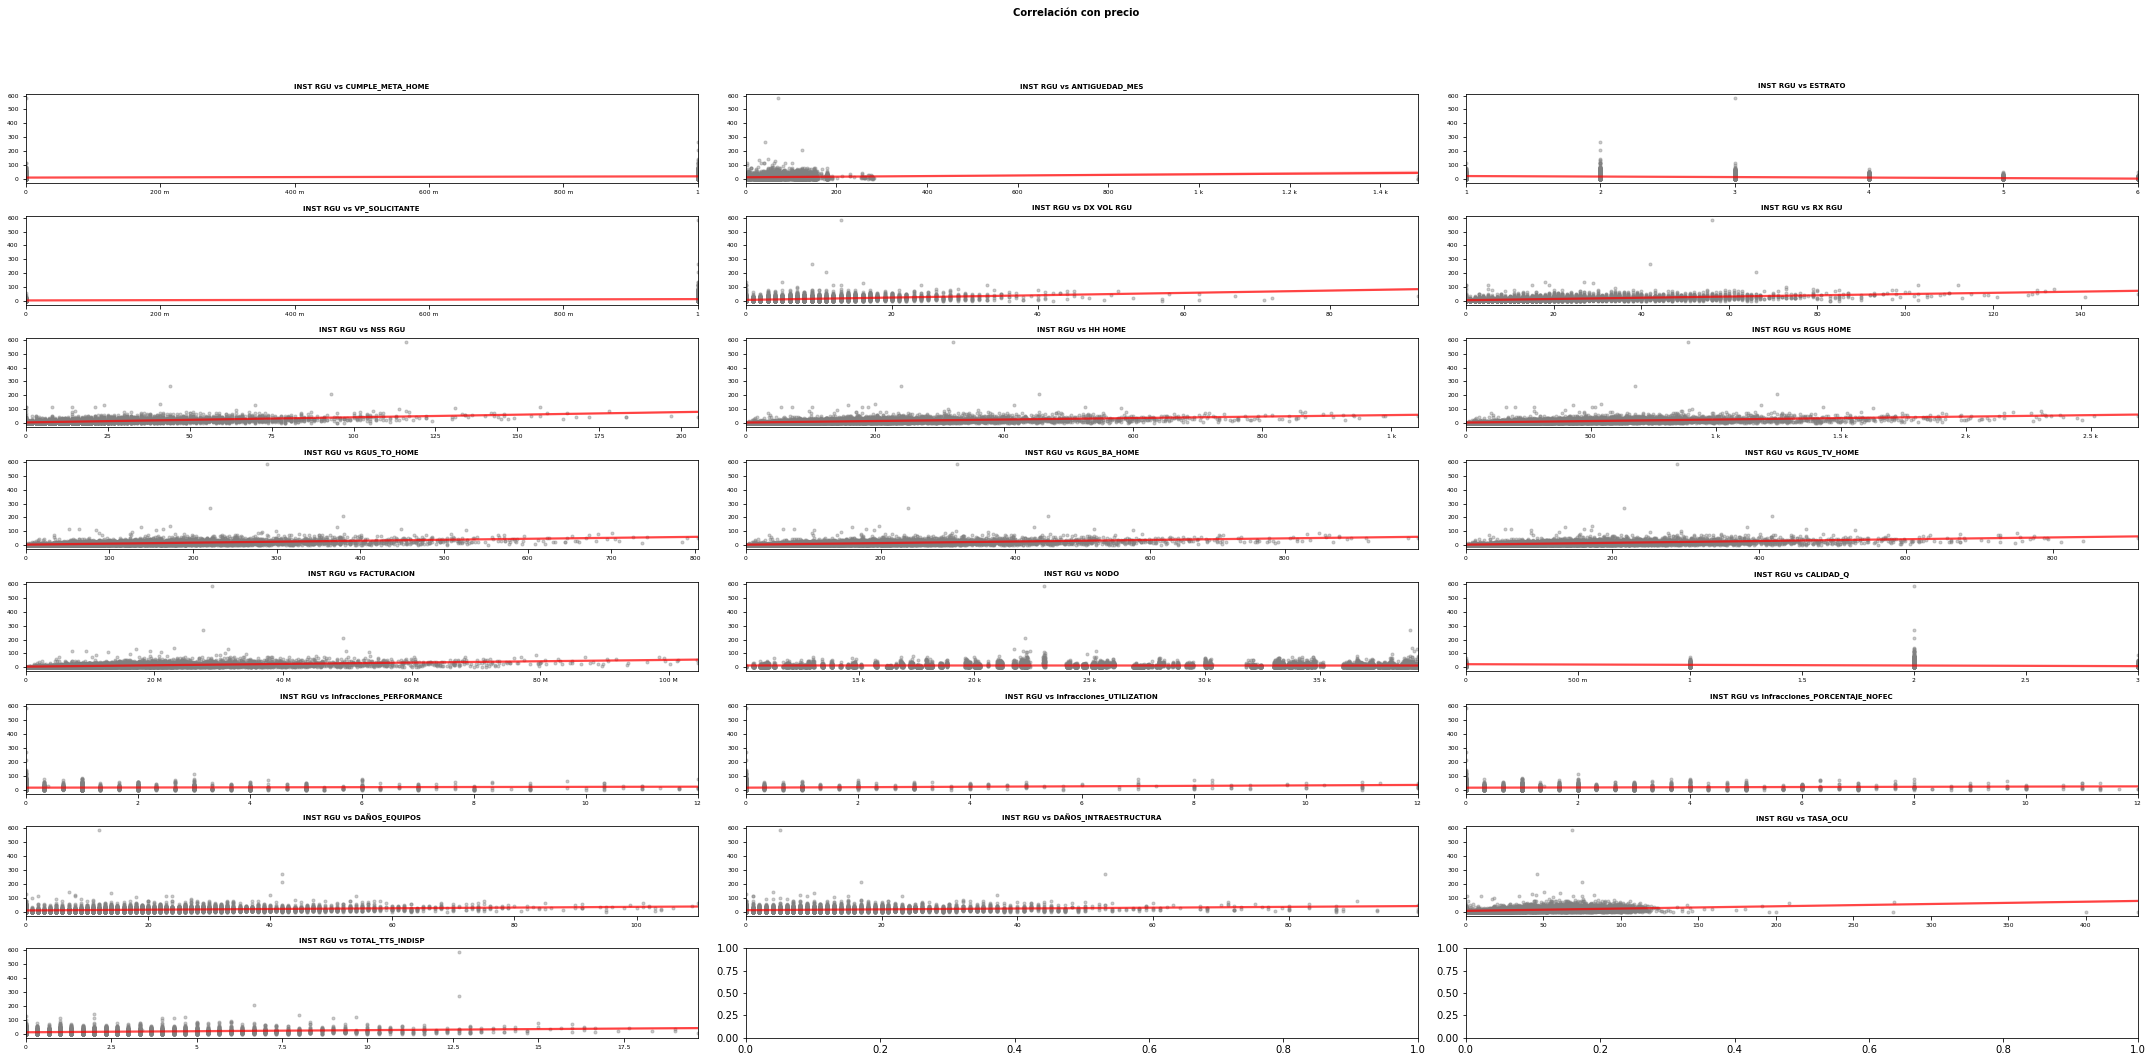

In [12]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(30, 15))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('INST RGU')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['INST RGU'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"INST RGU vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

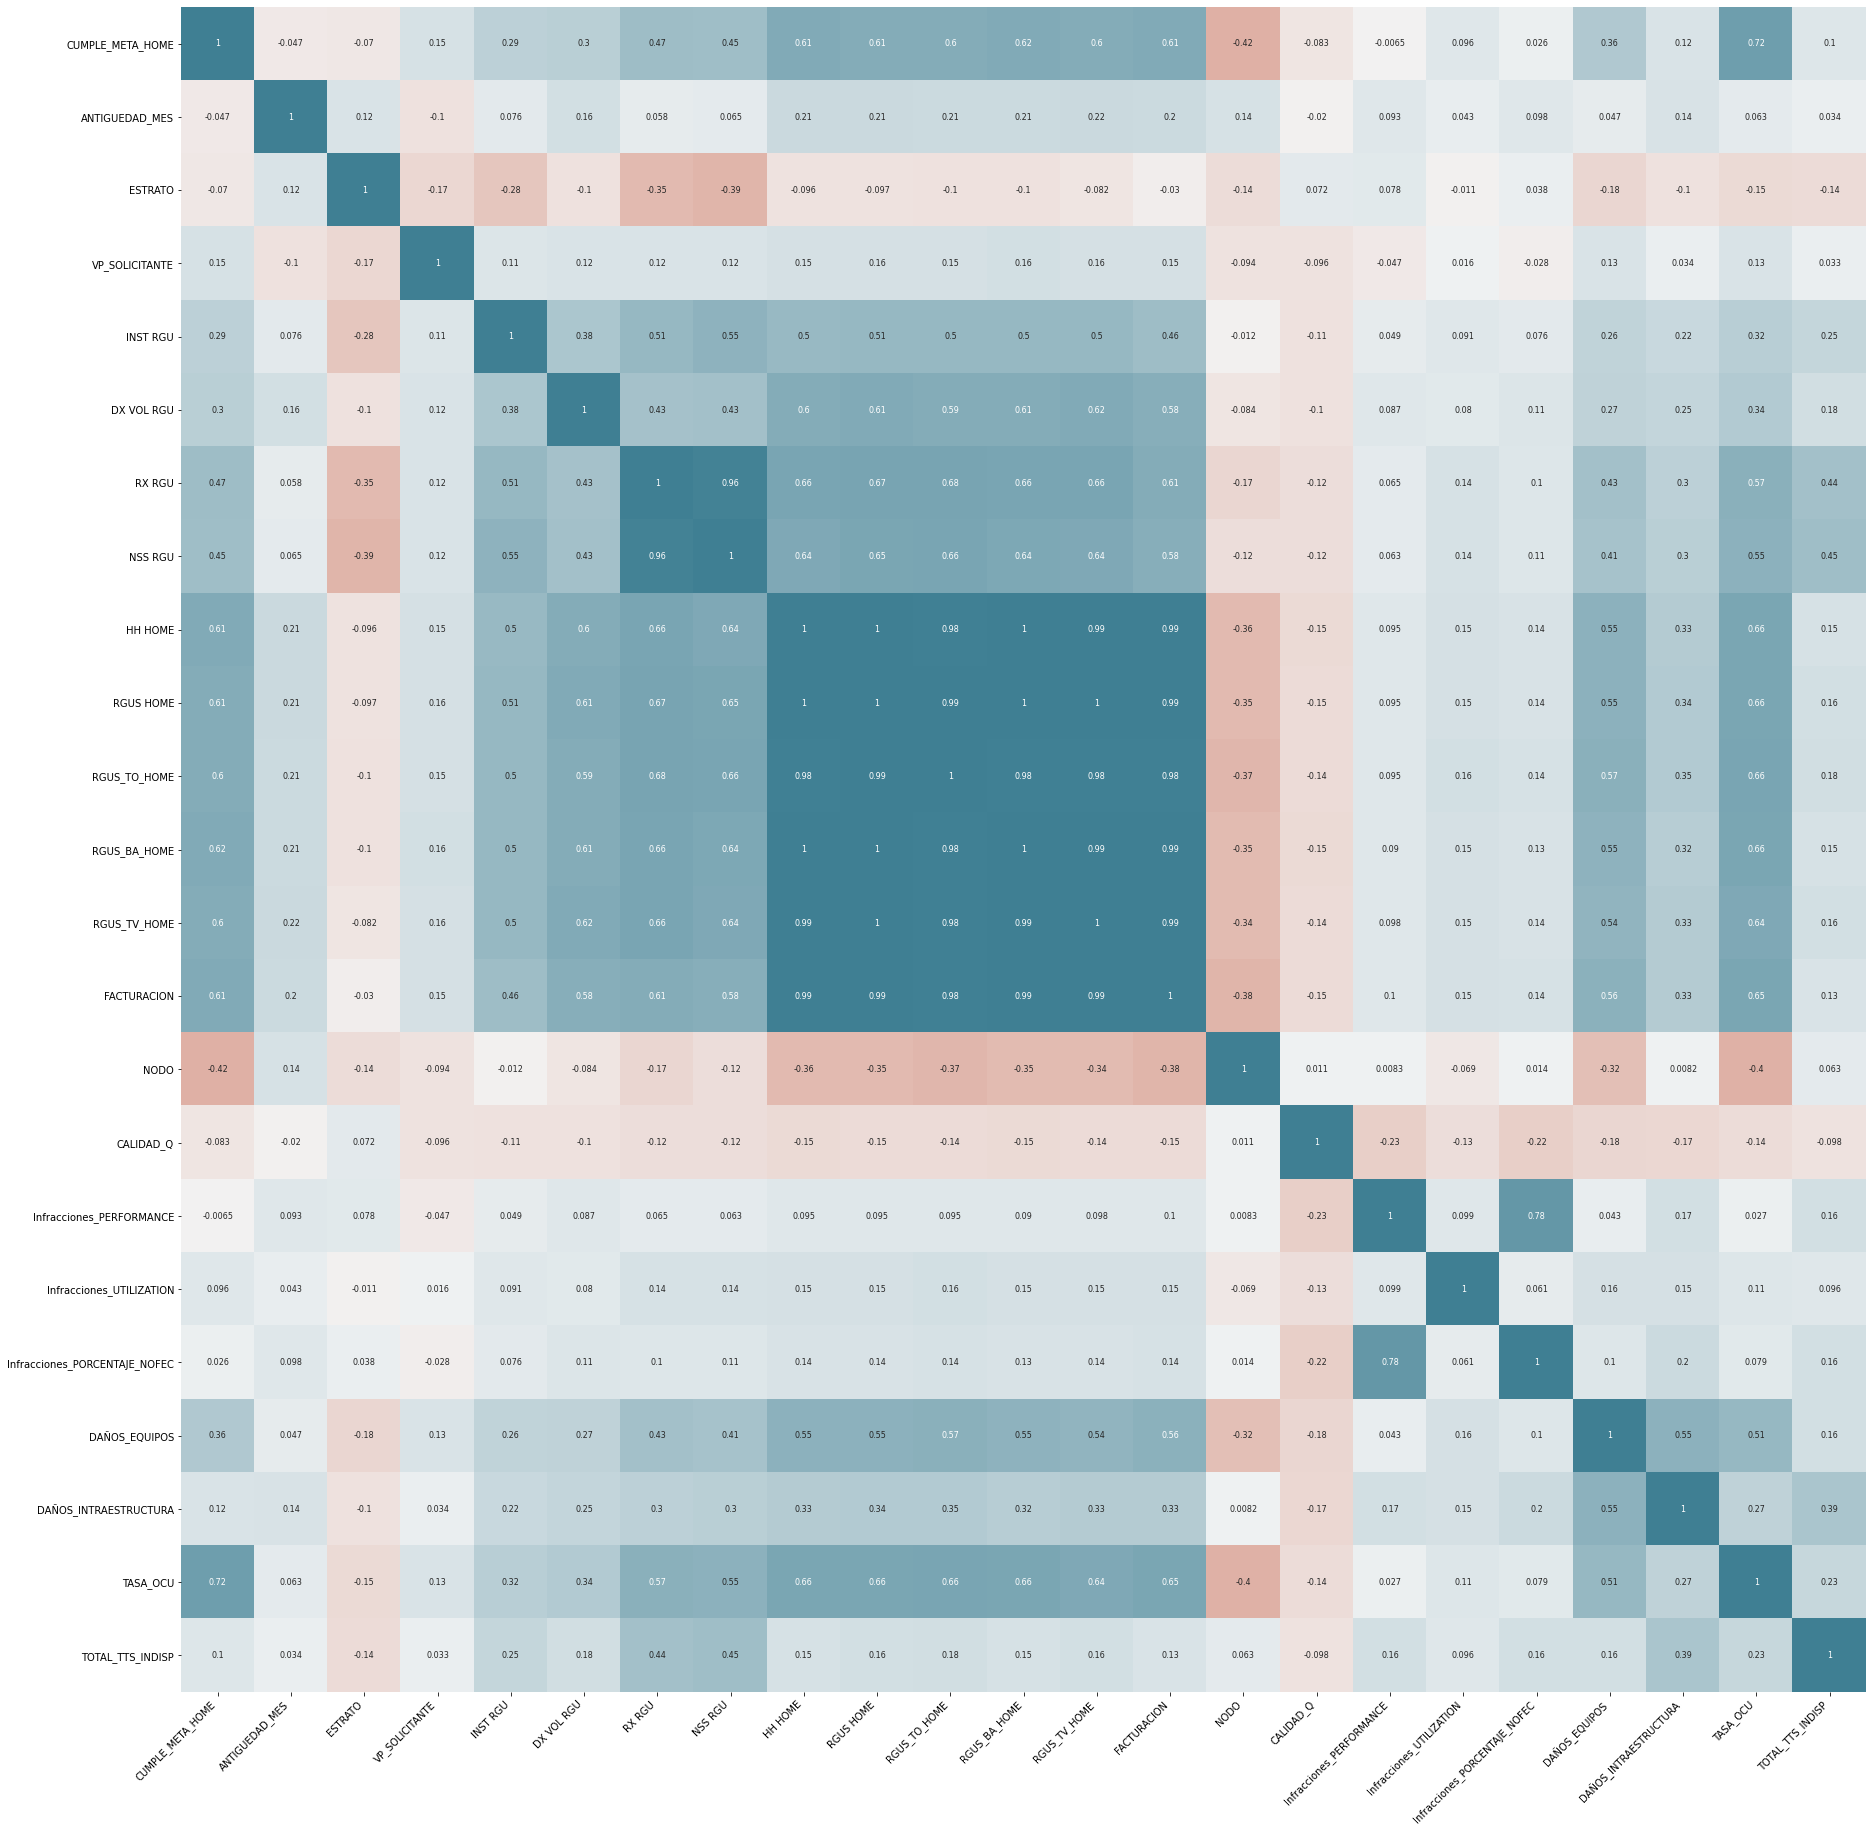

In [13]:
#Matriz de correlación
# Heatmap matriz de correlaciones
# ==============================================================================
corr_matrix = df.corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(31, 31))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [14]:
#Eliminar variables correlacionadas
df.drop(['HH HOME'], axis='columns', inplace=True) #Se elimina por su alta correlación con otras variables
df.drop(['RGUS_TV_HOME', 'RGUS_BA_HOME', 'RGUS_TO_HOME'], axis='columns', inplace=True) #Se eliminan por su alta correlación con RGUS HOME
df.drop(['FACTURACION'], axis='columns', inplace=True) #Se elimina facturación por su alta correlación con RGUS HOME
df.drop(['NSS RGU'], axis='columns', inplace=True) #Se elimina facturación por su alta correlación con RX RGU
df.drop(['Infracciones_PORCENTAJE_NOFEC'], axis='columns', inplace=True) #Se elimina facturación por su alta correlación con Infracciones_PERFORMANCE
df.drop(['CUMPLE_META_HOME'], axis='columns', inplace=True) #Se elimina facturación por su alta correlación con TASA_OCU
df.drop(['NODO'], axis='columns', inplace=True) #No tiene una relación con nada
df.drop(['REGION', 'VP_SOLICITANTE', 'DX VOL RGU', 'RX RGU', 'RGUS HOME', 'DAÑOS_EQUIPOS', 'DAÑOS_INTRAESTRUCTURA'], axis='columns', inplace=True)

In [15]:
df.loc[df.duplicated()]

,ANTIGUEDAD_MES,ESTRATO,INST RGU,CALIDAD_Q,Infracciones_PERFORMANCE,Infracciones_UTILIZATION,TASA_OCU,TOTAL_TTS_INDISP
6218,42,3,0,2.0,0.0,0.0,0.0,0.0
6223,42,3,0,2.0,0.0,0.0,0.0,0.0
8381,175,3,18,2.0,0.0,0.0,0.0,0.0
8415,179,3,7,2.0,0.0,0.0,0.0,0.0
8454,179,3,10,2.0,0.0,0.0,0.0,0.0


In [16]:
#Top de correlaciones
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
22,INST RGU,TASA_OCU,0.315464,0.315464
50,TASA_OCU,INST RGU,0.315464,0.315464
17,INST RGU,ESTRATO,-0.279430,0.279430
10,ESTRATO,INST RGU,-0.279430,0.279430
58,TOTAL_TTS_INDISP,INST RGU,0.245429,0.245429
23,INST RGU,TOTAL_TTS_INDISP,0.245429,0.245429
62,TOTAL_TTS_INDISP,TASA_OCU,0.230950,0.230950
55,TASA_OCU,TOTAL_TTS_INDISP,0.230950,0.230950
35,Infracciones_PERFORMANCE,CALIDAD_Q,-0.225422,0.225422
28,CALIDAD_Q,Infracciones_PERFORMANCE,-0.225422,0.225422


# 5. MODELO DE CLUSTERING

## 5.1. VARIABLES DUMMIES

In [17]:
#Variables dummies
d2=df #Hacemos una copia de los datos

#Creamos variables dummy para convertir  las categorías a números

d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8745 entries, 0 to 8744
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANTIGUEDAD_MES            8745 non-null   int64  
 1   ESTRATO                   8745 non-null   int64  
 2   INST RGU                  8745 non-null   int64  
 3   CALIDAD_Q                 8745 non-null   float64
 4   Infracciones_PERFORMANCE  8745 non-null   float64
 5   Infracciones_UTILIZATION  8745 non-null   float64
 6   TASA_OCU                  8745 non-null   float64
 7   TOTAL_TTS_INDISP          8745 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 872.9 KB


## 5.2. ENCONTRAR VALOR K

([<matplotlib.axis.XTick at 0x1efd2bb1fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

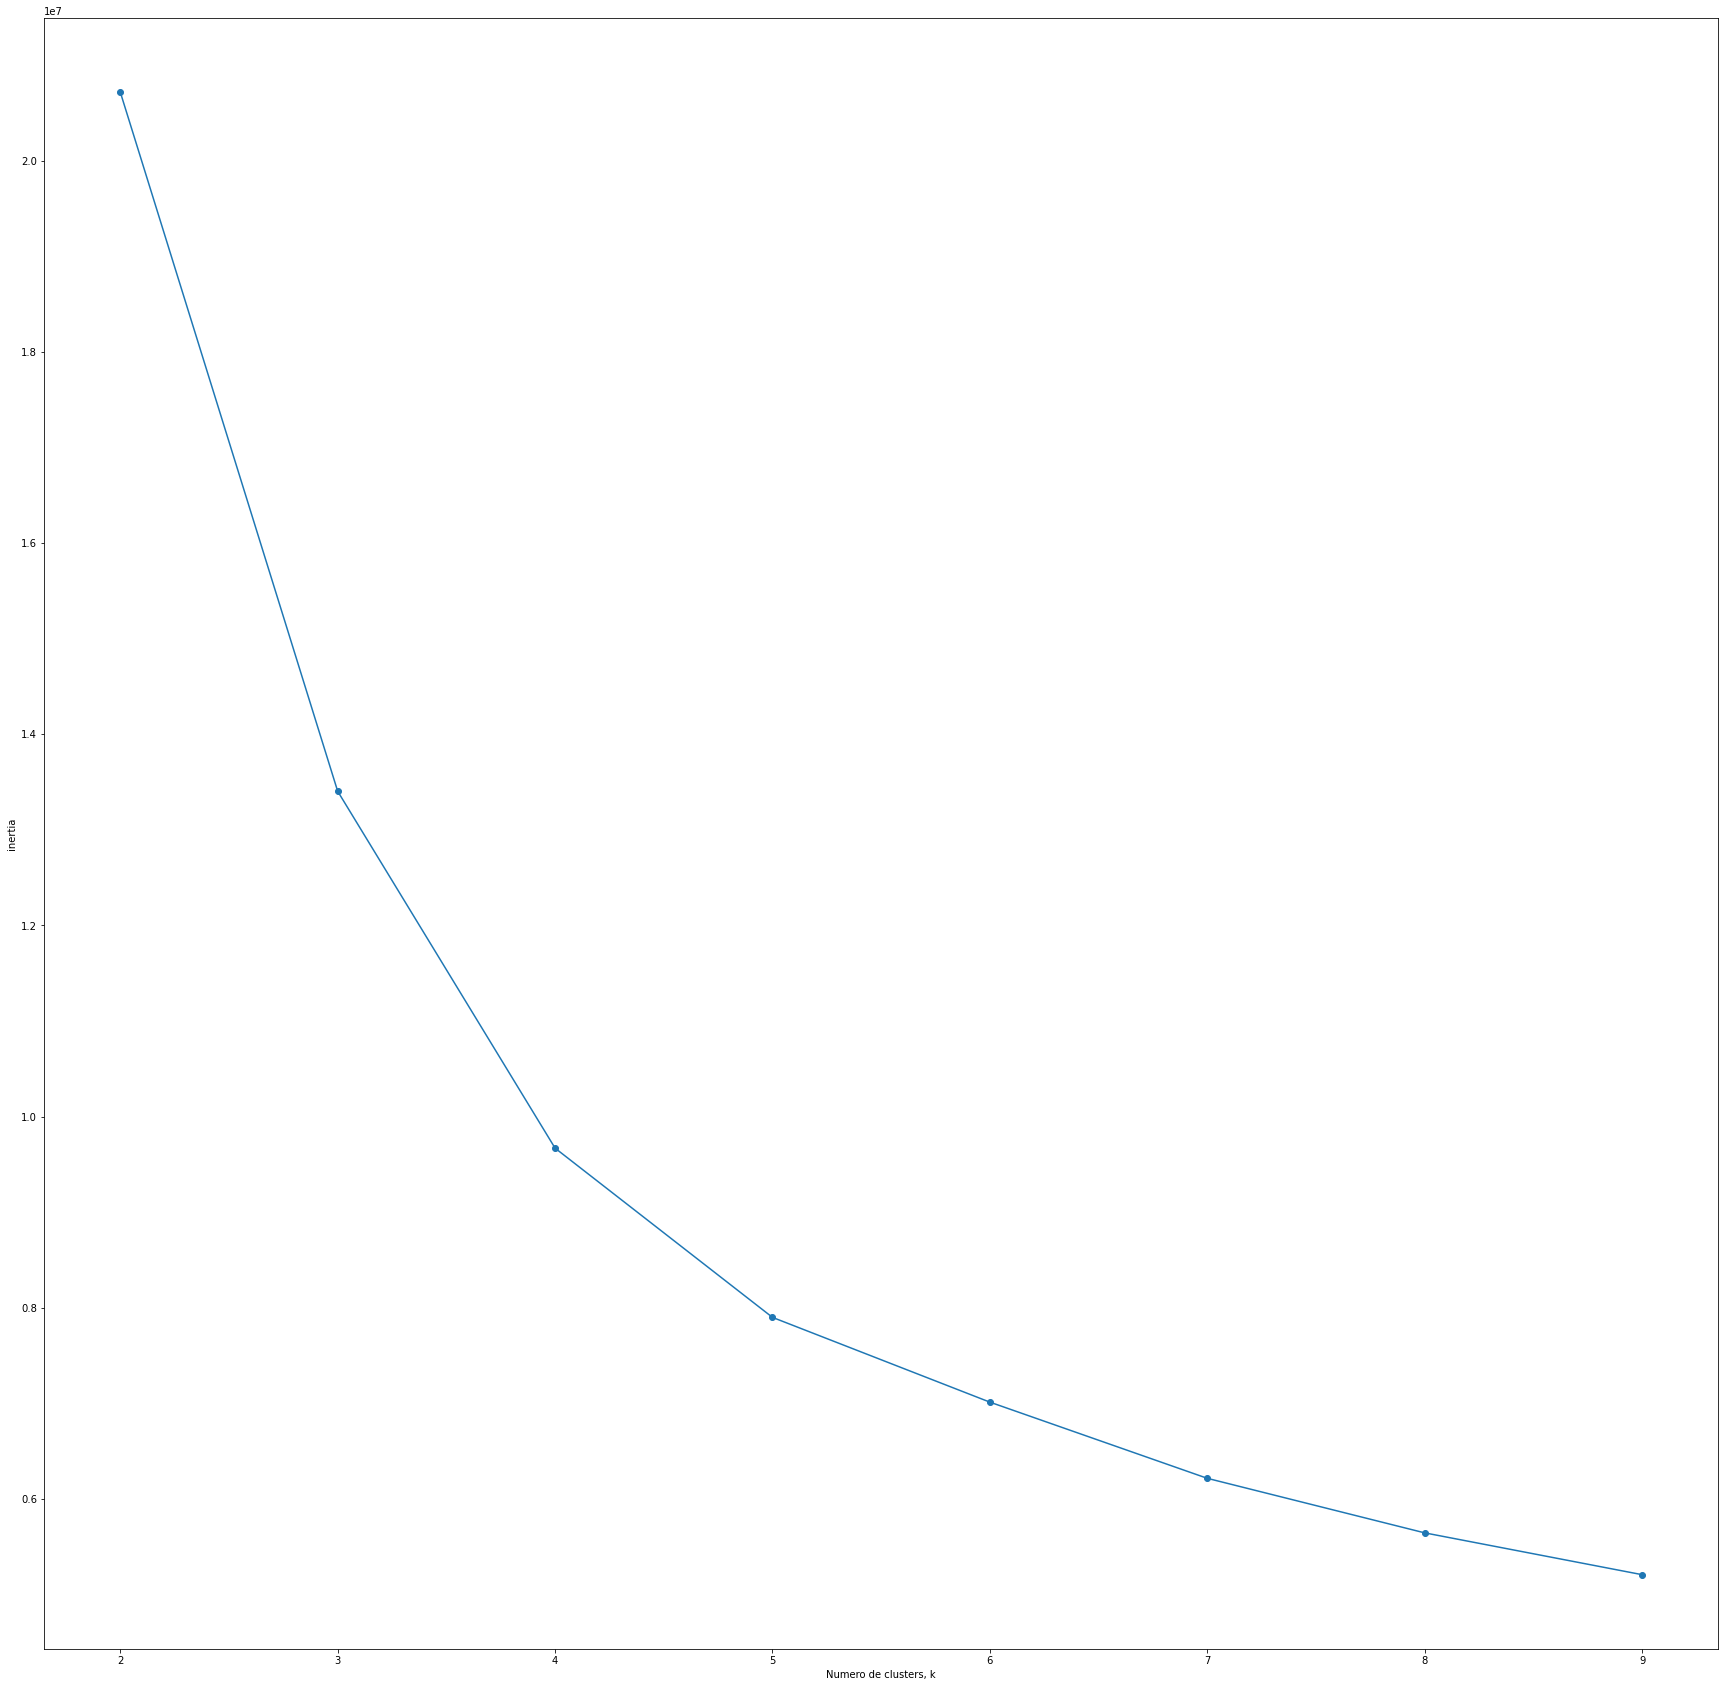

In [18]:
#Método del codo para encontrar la mejor cantidad de clusters 
from sklearn.cluster import KMeans 
ks = range(2, 10) # crear valores del 2 al 10
inertias = []
 
for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k)
    model.fit(d2)
    inertias.append(model.inertia_)
    
# Graficar cantidad de clusters vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

## 5.3. MODELO

In [19]:
#Se toman 7 clusters

#Creación del modelo
from sklearn.cluster import KMeans 
model = KMeans(n_clusters=8, max_iter=1000)
model.fit(d2)

KMeans(max_iter=1000)

## 5.4. MÉTRICAS DEL MODELO

In [20]:
#Evaluación
from sklearn import metrics
 
print(f'inertia del modelo = {model.inertia_}')
 
clusters=model.predict(d2) #cluster asignado a cada registro
dv=metrics.davies_bouldin_score(d2,clusters)
sil=metrics.silhouette_score(d2, clusters)
print(f'Indice Davies and Bouldin={dv}')
print(f'Indice de Silueta={sil}')

inertia del modelo = 5650567.40913225
Indice Davies and Bouldin=0.9544208451324072
Indice de Silueta=0.3272705938223823


In [21]:
#Centroides

centroides=pd.DataFrame(model.cluster_centers_, columns=d2.columns.values)
centroides.round(0)

,ANTIGUEDAD_MES,ESTRATO,INST RGU,CALIDAD_Q,Infracciones_PERFORMANCE,Infracciones_UTILIZATION,TASA_OCU,TOTAL_TTS_INDISP
0,36.0,3.0,7.0,2.0,0.0,0.0,22.0,1.0
1,131.0,3.0,26.0,2.0,1.0,0.0,77.0,3.0
2,70.0,3.0,24.0,2.0,0.0,0.0,88.0,3.0
3,1482.0,4.0,5.0,2.0,0.0,0.0,44.0,1.0
4,40.0,3.0,13.0,2.0,0.0,0.0,70.0,2.0
5,198.0,4.0,15.0,2.0,0.0,0.0,53.0,0.0
6,123.0,3.0,9.0,2.0,1.0,0.0,32.0,2.0
7,68.0,3.0,12.0,2.0,0.0,0.0,35.0,2.0


In [22]:
#Cuenta los datos x clúster

d2["clusters"] = clusters
d2.head(6)

pd.value_counts(d2["clusters"])

0    1871
6    1849
4    1527
7    1378
2    1032
1     867
5     217
3       4
Name: clusters, dtype: int64

# 6. ANÁLISIS CLUSTERS

In [23]:
#Selección de los datos
d3=d2[d2.clusters.isin([1, 2, 5])]

In [24]:
#Descripción de los datos
d3.describe()

,ANTIGUEDAD_MES,ESTRATO,INST RGU,CALIDAD_Q,Infracciones_PERFORMANCE,Infracciones_UTILIZATION,TASA_OCU,TOTAL_TTS_INDISP,clusters
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,108.063327,2.767013,23.827505,1.959357,0.576717,0.298519,79.972309,2.578292,1.897921
std,46.171545,1.082449,21.864660,0.349606,1.475247,1.362524,24.405346,2.918058,1.150177
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,2.000000,11.000000,2.000000,0.000000,0.000000,65.810833,0.333333,1.000000
50%,102.000000,3.000000,20.000000,2.000000,0.000000,0.000000,79.576667,1.666667,2.000000
75%,140.000000,3.000000,32.000000,2.000000,0.000000,0.000000,94.897500,3.333333,2.000000
max,282.000000,6.000000,585.000000,3.000000,12.000000,12.000000,433.333333,19.000000,5.000000


<AxesSubplot:ylabel='Frequency'>

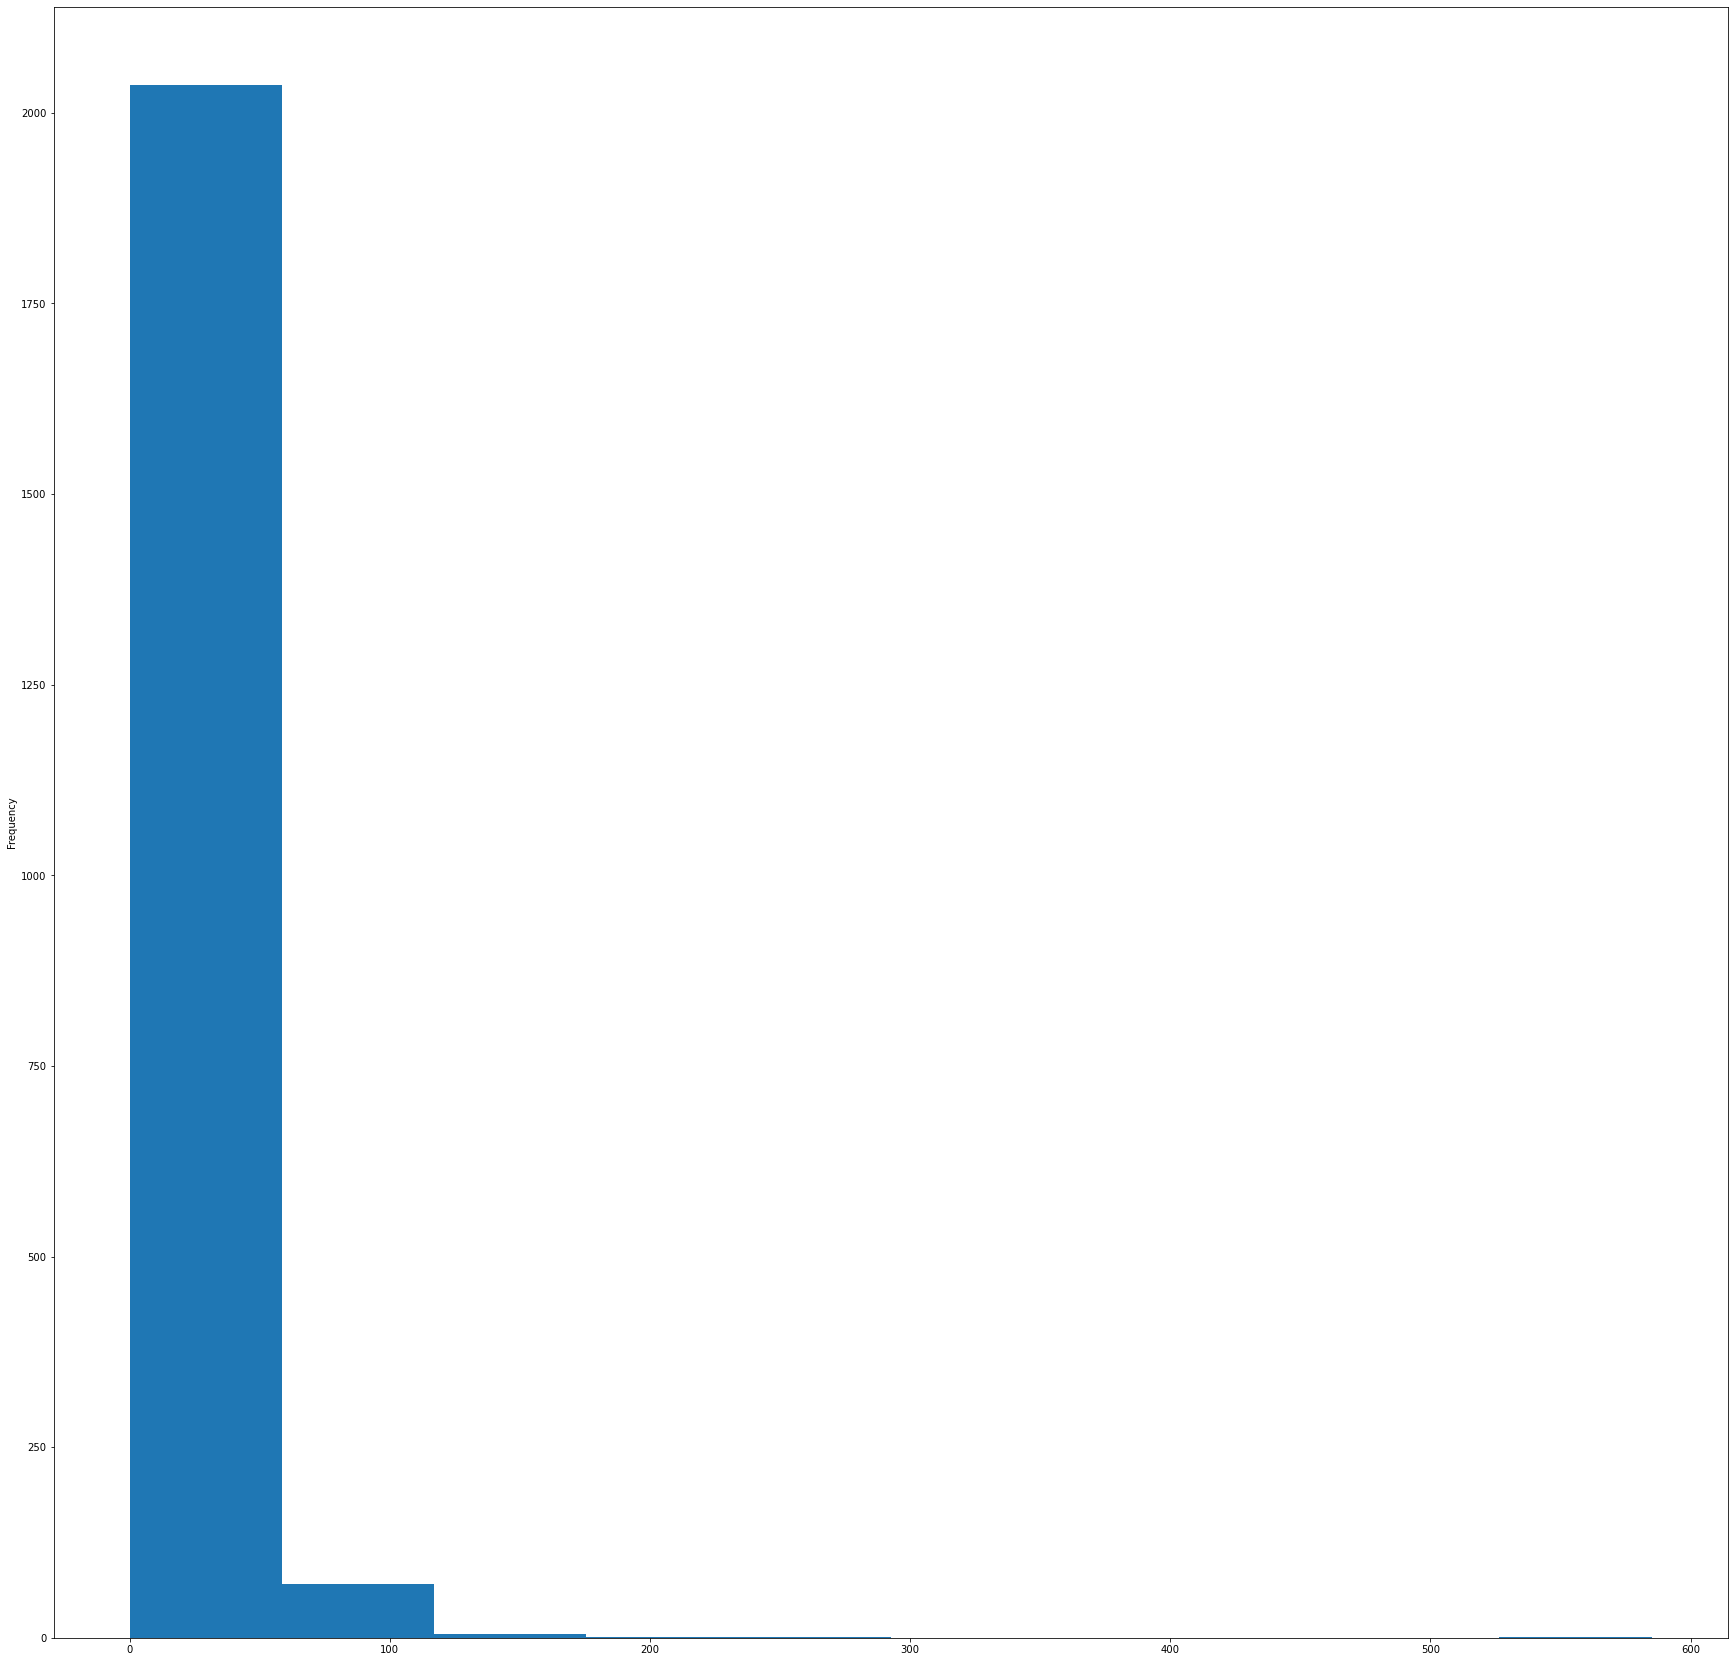

In [25]:
#Histograma de instalaciones
d3['INST RGU'].plot.hist()

In [26]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 15 to 8548
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANTIGUEDAD_MES            2116 non-null   int64  
 1   ESTRATO                   2116 non-null   int64  
 2   INST RGU                  2116 non-null   int64  
 3   CALIDAD_Q                 2116 non-null   float64
 4   Infracciones_PERFORMANCE  2116 non-null   float64
 5   Infracciones_UTILIZATION  2116 non-null   float64
 6   TASA_OCU                  2116 non-null   float64
 7   TOTAL_TTS_INDISP          2116 non-null   float64
 8   clusters                  2116 non-null   int32  
dtypes: float64(5), int32(1), int64(3)
memory usage: 157.0 KB


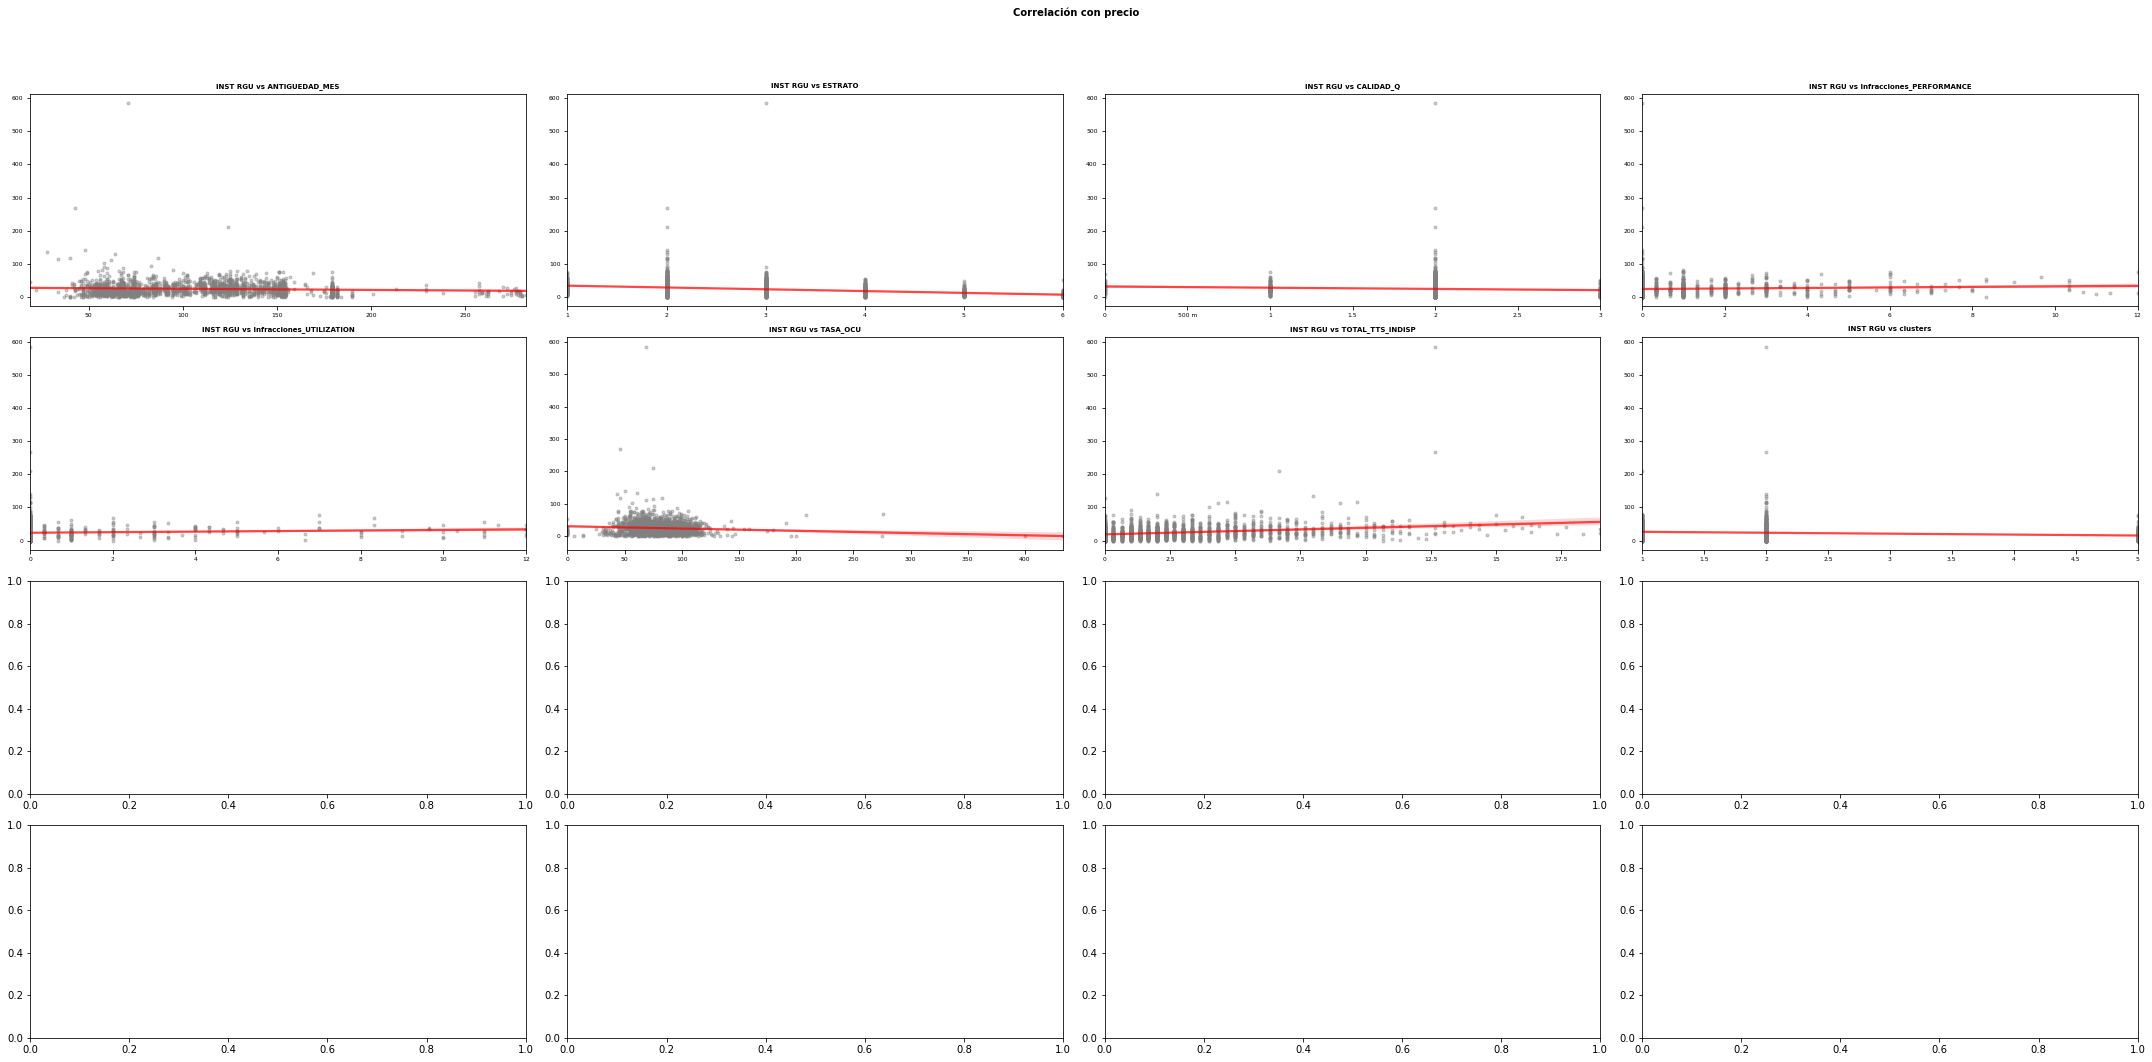

In [27]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 15))
axes = axes.flat
columnas_numeric = d3.select_dtypes(include=['float64', 'int64', 'int32']).columns
columnas_numeric = columnas_numeric.drop('INST RGU')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = d3[colum],
        y           = d3['INST RGU'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"INST RGU vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

# 7. MODELO DE CLASIFICACIÓN

In [28]:
#Selección de variables
d2["Visitar"]=np.where(((d2['clusters']==1) | (d2['clusters']==2) | (d2['clusters']==5)) &
((d2['ESTRATO']>1) & (d2['ESTRATO']<5)) &
(d2['CALIDAD_Q']>1) &
(d2['Infracciones_PERFORMANCE']<5) &
(d2['Infracciones_UTILIZATION']<5) &
(d2['TASA_OCU']<80), 1, 0)

In [29]:
d2['Visitar'].value_counts()

0    7895
1     850
Name: Visitar, dtype: int64

In [30]:
#Copia de los datos
d1=d2
d1.drop(['clusters'], axis='columns', inplace=True)

In [31]:
# División de los datos en train y test
# ==============================================================================
X = d1.drop(columns = 'Visitar')
y = d1['Visitar']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                    )

## 7.1. SVM

### 7.1.1. Kernel lineal

In [55]:
#Modelo
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

#Predicciones
predicciones = modelo.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
#Métricas
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy test es: {100*accuracy}%")


recall=recall_score(
    y_true    = y_test,
    y_pred    = predicciones,
)
print("")
print(f"El recall test es: {100*recall}%")


precision=precision_score(
    y_true    = y_test,
    y_pred    = predicciones,
)
print("")
print(f"El precision test es: {100*precision}%")


# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix


El accuracy test es: 95.6546598056032%

El recall test es: 46.51162790697674%

El precision test es: 57.14285714285714%


Predicción,0,1
Real,,
0,1633,30
1,46,40


### 7.1.2. Kernel radial

In [32]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
18,2335721.46909,0.981275,0.001230,0.997070,0.000364
19,10000000.0,0.979274,0.000729,0.996284,0.000364
17,545559.478117,0.979131,0.002383,0.994140,0.000535
16,127427.49857,0.977130,0.001326,0.989708,0.000350
15,29763.514416,0.975129,0.002643,0.987779,0.000463


In [33]:
#Modelo
modelo = SVC(C = 2335721.46909, kernel = 'rbf', random_state=123)
modelo.fit(X_train, y_train)

#Predicciones
predicciones = modelo.predict(X_test)

In [34]:
#Métricas
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy test es: {100*accuracy}%")


recall=recall_score(
    y_true    = y_test,
    y_pred    = predicciones,
)
print("")
print(f"El recall test es: {100*recall}%")


precision=precision_score(
    y_true    = y_test,
    y_pred    = predicciones,
)
print("")
print(f"El precision test es: {100*precision}%")


# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix


El accuracy test es: 98.45626072041166%

El recall test es: 90.0%

El precision test es: 92.90322580645162%


Predicción,0,1
Real,,
0,1578,11
1,16,144


## 7.2. ÁRBOL DE DECISIÓN

In [43]:
#Modelo
modelo = DecisionTreeClassifier(
            max_depth         = 20,
            criterion         = 'gini',
            random_state      = 123
          )
modelo.fit(X_train, y_train)


#Predicciones
predicciones = modelo.predict(X = X_test)

In [44]:
#Métricas
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy test es: {100*accuracy}%")


recall=recall_score(
    y_true    = y_test,
    y_pred    = predicciones,
)
print("")
print(f"El recall test es: {100*recall}%")


precision=precision_score(
    y_true    = y_test,
    y_pred    = predicciones,
)
print("")
print(f"El precision test es: {100*precision}%")


# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix


El accuracy test es: 98.9136649514008%

El recall test es: 94.375%

El precision test es: 93.7888198757764%


Predicción,0,1
Real,,
0,1579,10
1,9,151


Profundidad del árbol: 15
Número de nodos terminales: 105


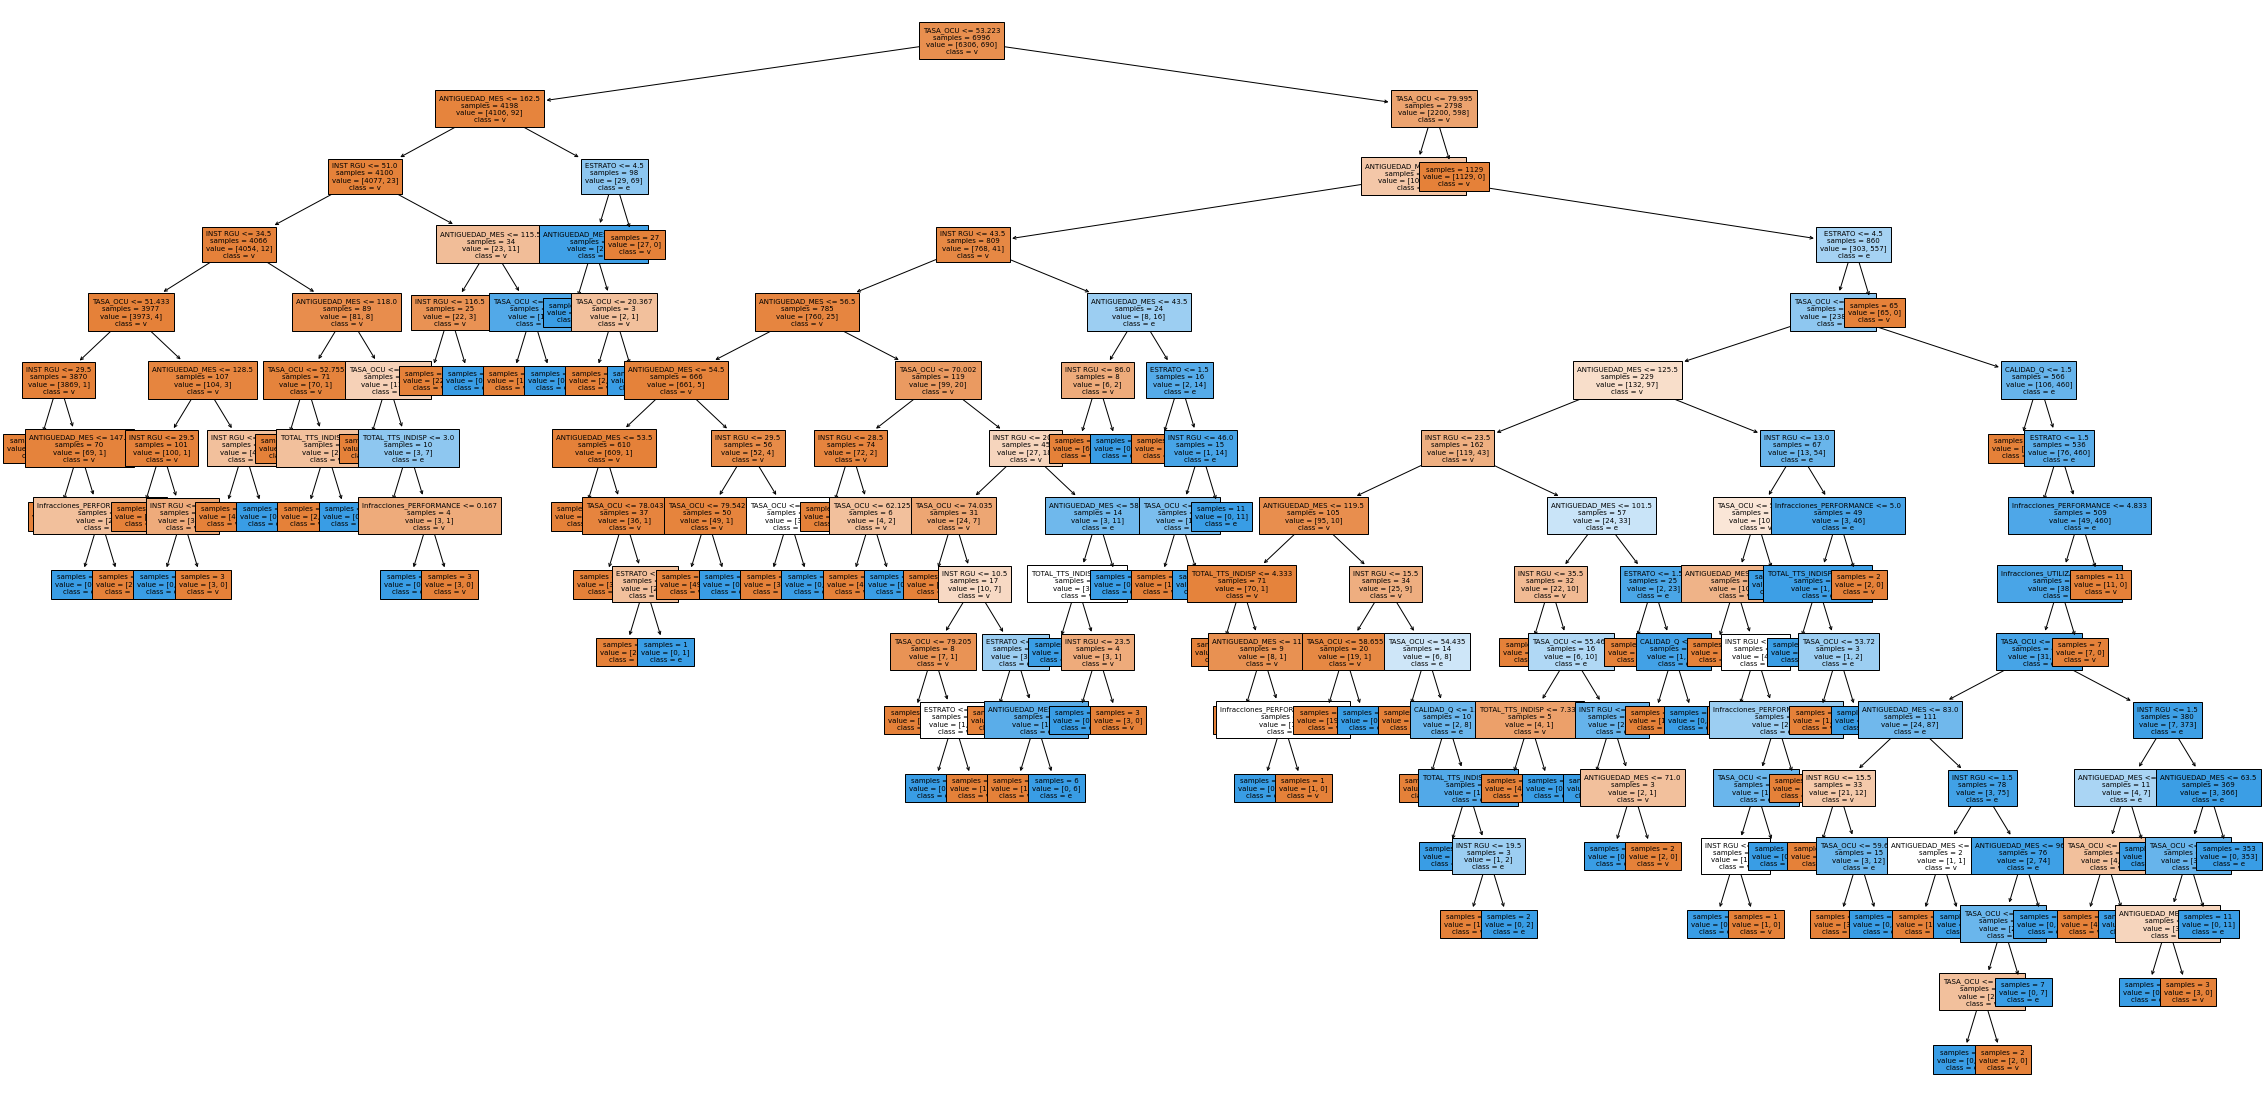

In [45]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
numeric_cols = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns.to_list()
labels = np.concatenate([numeric_cols])

fig, ax = plt.subplots(figsize=(40, 20))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(),
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

# 8. SELECCIÓN Y SAVE DEL MODELO

In [46]:
#SE SELECCIONA EL MODELO DE ÁRBOL DE DECISIÓN YA QUE ES EL QUE GENERA MEJOR DESEPEÑO EN INDICADORES
#LAS VARIABLES DEL MODELO SON LAS SIGUIENTES:
d1.columns

Index(['ANTIGUEDAD_MES', 'ESTRATO', 'INST RGU', 'CALIDAD_Q',
       'Infracciones_PERFORMANCE', 'Infracciones_UTILIZATION', 'TASA_OCU',
       'TOTAL_TTS_INDISP', 'Visitar'],
      dtype='object')

In [48]:
#Se guarda el modelo
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(modelo, file)

In [49]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [51]:
x_in = np.asarray([90, 2 ,50, 3, 1, 2, 60, 3]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

1

In [58]:
import streamlit

ModuleNotFoundError: No module named 'streamlit'